# Portland Tri Met Data 
### (A Look at Delays)

##### Evan Bicher

This data was given to the Portland Data Science MeetUp group from Tri Met and was shared with me. This data shows the location, delay and ID of all the Tri Met metro cars throughout a day. The data is seperated in two CSV files but can be matched together with their two primary keys. I'm unclear why the data was originally seperated. A few things I wanted to find out from this data:

1. What is the average delay time of the Tri Met system?
2. Are there certain lines/routes that have greater delays than others?
3. If you were to add another car to a colored route, which one would need it?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [3]:
dftrip = pd.read_csv('trips_day.csv')
dfevent = pd.read_csv('events_day.csv')


In [4]:
# Joining the two dataframes using the two primary keys 'tripID' and 'vehicle_id'
df = pd.merge(dftrip, dfevent, on=['tripID', 'vehicle_id'])

In [5]:
# Convert time field into a datetire format
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

In [6]:
# Looks good
df.head()

,tripID,vehicle_id,blockID,direction,garage,routeNumber,bearing,delay,timestamp,lastLocID,lastStopSeq,nextLocID,nextStopSeq,signMessageLong,vehicle_location_longitude,vehicle_location_latitude
0,7126389,115,9040,0,ELMO,90,36,-154,2017-01-31 11:35:05,9821,5,9821,1,MAX Red Line to Airport,-122.801139,45.491778
1,7126389,201,9040,0,ELMO,90,36,-154,2017-01-31 11:35:05,9821,5,9821,1,MAX Red Line to Airport,-122.801139,45.491778
2,7126389,209,9040,0,ELMO,90,103,52,2017-01-31 12:00:15,8335,9,8336,10,MAX Red Line to Airport,-122.674350,45.517152
3,7126389,209,9040,0,ELMO,90,21,30,2017-01-31 12:00:50,8336,10,8337,11,MAX Red Line to Airport,-122.673368,45.518051
4,7126389,209,9040,0,ELMO,90,57,27,2017-01-31 12:05:22,8339,13,8340,14,MAX Red Line to Airport,-122.669638,45.527331


## Delay Distribution

Let's start by looking at the Delay Distribution as a whole, and see if the Tri Met is usually on time or usually late. 

The average Tri Met ride is -90.0508963303501 seconds late.


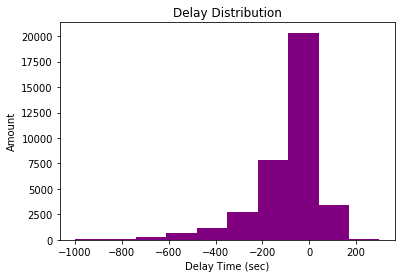

In [17]:
plt.hist(df['delay'], color='purple')
plt.ylabel('Amount')
plt.xlabel('Delay Time (sec)')
plt.title('Delay Distribution')

print('The average Tri Met ride is '+ str(df['delay'].mean()) + ' seconds late.')

So on average, the metro is almost exactly a minute and a half late. Is this pretty equal among all routes or are some more prone to delays?

## Seperated by Route Name

Here is a graph which has the data seperated by the route name. As you can see, some routes are more likely to be delayed.

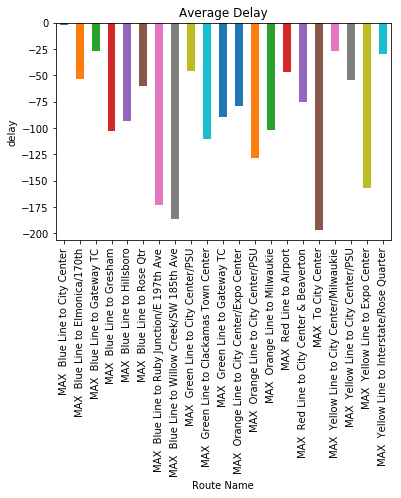

In [10]:
df.groupby('signMessageLong').delay.mean().plot(kind="bar")
plt.xlabel('Route Name')
plt.ylabel('delay')
plt.title('Average Delay');

That is a lot of routes to look at. It might be better to seperate by color.

## Seperated by Color

The data has a row called 'signMessageLong' which contains the name of the Route (like 'Red MAX to airport'). To seperate by color I searched for routes containing colors and grouped them up. 

In [19]:
dfred = df[df['signMessageLong'].str.contains("Red")]
dfblue = df[df['signMessageLong'].str.contains("Blue")]
dfgreen = df[df['signMessageLong'].str.contains("Green")]
dforange = df[df['signMessageLong'].str.contains("Orange")]
dfyellow = df[df['signMessageLong'].str.contains("Yellow")]

In [20]:
dfred['color'] = 'Red Lines'
dfblue['color'] = 'Blue Lines'
dfgreen['color'] = 'Green Lines'
dforange['color'] = 'Orange Lines'
dfyellow['color'] = 'Yellow Lines'

c:\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

In [21]:
result = pd.concat([dfred,dfblue,dfgreen,dforange,dfyellow])

This graph shows delay seperated by route color.

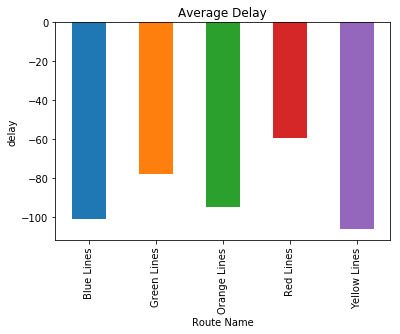

In [24]:
result.groupby('color').delay.mean().plot(kind = "bar")
plt.xlabel('Route Name')
plt.ylabel('delay')
plt.title('Average Delay');

In [26]:
print('The average delay for the Red lines is '+ str(dfred['delay'].mean()) + ' seconds.')
print('The average delay for the Blue lines is '+ str(dfblue['delay'].mean()) + ' seconds.')
print('The average delay for the Green lines is '+ str(dfgreen['delay'].mean()) + ' seconds.')
print('The average delay for the Orange lines is '+ str(dforange['delay'].mean()) + ' seconds.')
print('The average delay for the Yello lines is '+ str(dfyellow['delay'].mean()) + ' seconds.')

greatdelay = dfyellow['delay'].mean() - dfred['delay'].mean()

print('Greatest difference = ' + str(greatdelay))

The average delay for the Red lines is -59.2946111648919 seconds.
The average delay for the Blue lines is -100.97968994111285 seconds.
The average delay for the Green lines is -78.12540244687702 seconds.
The average delay for the Orange lines is -94.80943922862218 seconds.
The average delay for the Yello lines is -106.41058540497194 seconds.
Biggest difference = -47.11597424008004


According to this data, the Tri Met has pretty balanced delays among the different routes. The greatest difference is among the yellow line (the line with the most delay time) and the red line (the line with the least delay time), and it is only a difference of less than a minute (~47 seconds). That seems to short of a time difference to warrant any kind of change among the system. 

## Delay Distribution Seperated by Color

Next let's look at the distributions of the different colored lines. This is a histogram with them stacked on one another, each color representing its color line.

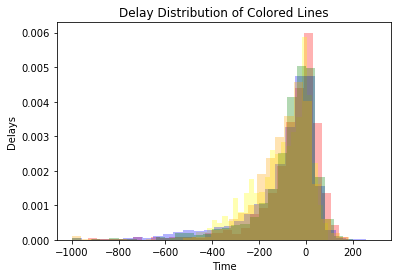

In [38]:
plt.hist(dfred['delay'], bins=30, density=True, color='red', alpha=.3)
plt.hist(dfyellow['delay'], bins=30, density=True, color='yellow', alpha=.3)
plt.hist(dfblue['delay'], bins=30, density=True, color='blue', alpha=.3)
plt.hist(dfgreen['delay'], bins=30, density=True, color='green', alpha=.3)
plt.hist(dforange['delay'], bins=30, density=True, color='orange', alpha=.3)
plt.ylabel('Delays')
plt.xlabel('Time')
plt.title('Delay Distribution of Colored Lines')


plt.show()

They all seem to have the same distribution and only vary a bit.

# Conclusion

The data shows that all the lines have pretty similar delay times so there is no need to add a car or improve the speed of one route in particular. The only advice I could give is to add a minute to the travel time for each route, equally seperated through the stops. This would take the delay times down quite a bit.

This data is only from one day so there is definitely a chance that the delay distribution would be different on other days. To have a better idea of the Tri Met data, I would have to look at a bigger data set. 










### \*Bonus Fun* 
### What is the fastest train car?

For fun lets compare all the vehicle_ids and see which one is the fastest and which one is the slowest. We have the data to do it, so why not!

In [42]:
def findFastTrain():
    x = -500
    y = 10
    for i in result['vehicle_id']:
        itertrain = result[result['vehicle_id'] == i]
        if itertrain['delay'].mean() >= x:
            x = itertrain['delay'].mean()
            y = i
    print('The fastest vehicle has the id of: ' + str(y) + ' and the delay was: ' + str(x))
    return 1
            

In [47]:
findFastTrain()

The fastest vehicle has the id of: 311 and the delay was: 0.0


1

In [43]:
def findSlowTrain():
    x = 0
    y = 10
    for i in result['vehicle_id']:
        itertrain = result[result['vehicle_id'] == i]
        if itertrain['delay'].mean() <= x:
            x = itertrain['delay'].mean()
            y = i
    print('The slowest vehicle has the id of: ' + str(y) + ' and the delay was: ' + str(x))
    return 1
            

In [48]:
findSlowTrain()

The fastest vehicle has the id of: 324 and the delay was: -413.60526315789474


1

Conclusion - Have a mechanic look at the metro with vehicle id 324 to make sure it is running up to speed.